In [1]:
# import all the tools

# regular EDA "exploratory data analysis and plotting libraries"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# plots inside notebook
%matplotlib inline

# models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

# model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve


Load Data


In [2]:
df = pd.read_csv("heart disease classification dataset.csv")
df = df.drop("Unnamed: 0", axis=1)
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,57,female,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,female,0,140.0,241.0,0,1,123.0,1,0.2,1,0,3,no
299,45,male,3,110.0,264.0,0,1,132.0,0,1.2,1,0,3,no
300,68,male,0,144.0,193.0,1,1,141.0,0,3.4,1,2,3,no
301,57,male,0,NaN,131.0,0,1,115.0,1,1.2,1,1,3,no


In [3]:
df.info

<bound method DataFrame.info of      age     sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    male   3     145.0  233.0    1        0    150.0      0      2.3   
1     37    male   2     130.0  250.0    0        1    187.0      0      3.5   
2     41  female   1     130.0  204.0    0        0    172.0      0      1.4   
3     56    male   1     120.0  236.0    0        1    178.0      0      0.8   
4     57  female   0       NaN  354.0    0        1    163.0      1      0.6   
..   ...     ...  ..       ...    ...  ...      ...      ...    ...      ...   
298   57  female   0     140.0  241.0    0        1    123.0      1      0.2   
299   45    male   3     110.0  264.0    0        1    132.0      0      1.2   
300   68    male   0     144.0  193.0    1        1    141.0      0      3.4   
301   57    male   0       NaN  131.0    0        1    115.0      1      1.2   
302   57  female   1     130.0  236.0    0        0    174.0      0      0.0   

     sl

In [4]:
# Encoding target to make integer    #
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for c in df.columns[0:]:
    if(df[c].dtype == 'object'):
        df[c] = encoder.fit_transform(df[c])
    else:
        df[c] = df[c]
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,1
2,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,1
3,56,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,1
4,57,0,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,1


Exploratory data analysis (EDA):the process of going through a dataset and finding out more about it.

Model training: create model(s) to learn to predict a target variable based on other variables.

Model evaluation: evaluating a models predictions using problem-specific evaluation metrics.

Model comparison: comparing several different models to find the best one.

Model fine-tuning: once we've found a good model, how can we improve it?

Feature importance: since we're predicting the presence of heart disease, are there some things which are more important for prediction?

Cross-validation: if we do build a good model, can we be sure it will work on unseen data?

Reporting what we've found: if we had to present our work, what would we show someone

# Data Exploration (exploratory data analysis or EDA)

EDA Methodolgy

What question(s) are you trying to solve (or prove wrong)?
What kind of data do you have and how do you treat different types?
What’s missing from the data and how do you deal with it?
Where are the outliers and why should you care about them?
How can you add, change or remove features to get more out of your data?

In [5]:
# first 5 rows
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,1
2,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,1
3,56,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,1
4,57,0,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,1


In [6]:
# last 5 rows
df.tail()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140.0,241.0,0,1,123.0,1,0.2,1,0,3,0
299,45,1,3,110.0,264.0,0,1,132.0,0,1.2,1,0,3,0
300,68,1,0,144.0,193.0,1,1,141.0,0,3.4,1,2,3,0
301,57,1,0,NaN,131.0,0,1,115.0,1,1.2,1,1,3,0
302,57,0,1,130.0,236.0,0,0,174.0,0,0.0,1,1,2,0


In [7]:
# how many of each class  #to balance #otherwise no balanec
df["target"].value_counts()


1    165
0    138
Name: target, dtype: int64

In [8]:
df.shape

(303, 14)

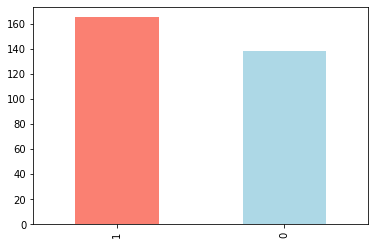

In [9]:
# visually show balance in target
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [10]:
df.info() #no object after encoder

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int32  
 2   cp        303 non-null    int64  
 3   trestbps  299 non-null    float64
 4   chol      302 non-null    float64
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   298 non-null    float64
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int32  
dtypes: float64(4), int32(2), int64(8)
memory usage: 30.9 KB


In [11]:
# check missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    4
chol        1
fbs         0
restecg     0
thalach     5
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:

df.fillna(df.mean(), inplace=True)



In [13]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [14]:
df.describe()  #how statical the dataset is # just statistics

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.712375,246.317881,0.148515,0.528053,149.865772,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.511894,51.822273,0.356198,0.525860,22.376122,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,136.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,241.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Heart Disease Frequency according to Gender (SEX)

In [15]:

df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [16]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


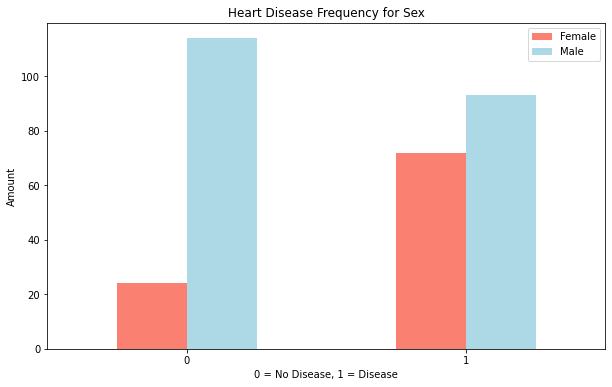

In [17]:
# create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10, 6), color=["salmon", "lightblue"])

# add some attributes
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
# keep labels on the x-axis vertical
plt.xticks(rotation=0);

# Age vs Max Heart Rate for Heart Disease

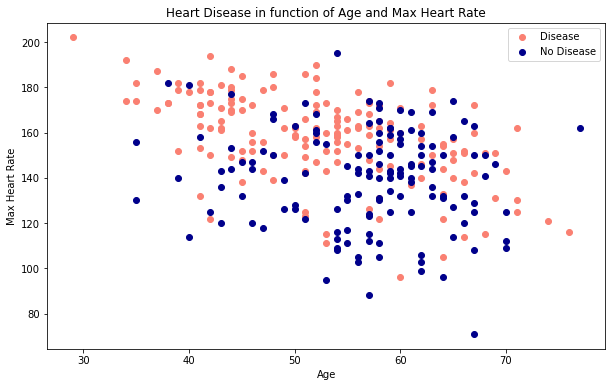

In [18]:
# create figure
plt.figure(figsize=(10, 6))

# scatter with filter data with target positive - heart disease
plt.scatter(df.age[df.target==1], df.thalach[df.target==1], c="salmon")

# scatter with target zero - no heart disease
plt.scatter(df.age[df.target==0], df.thalach[df.target==0], c="darkblue")

# add some description
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"])

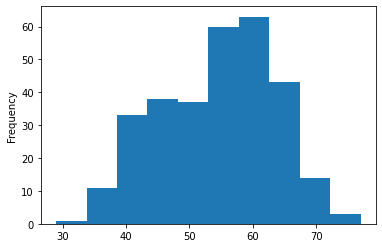

In [19]:
# distribution of the age column using histogram
df.age.plot.hist();

# Heart Disease Frequency as per Chest Pain Type

cp - chest pain type

0: Typical angina: chest pain related decrease blood supply to the heart

1: Atypical angina: chest pain not related to heart

2: Non-anginal pain: typically esophageal spasms (non heart related)

3: Asymptomatic: chest pain not showing signs of disease

In [20]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


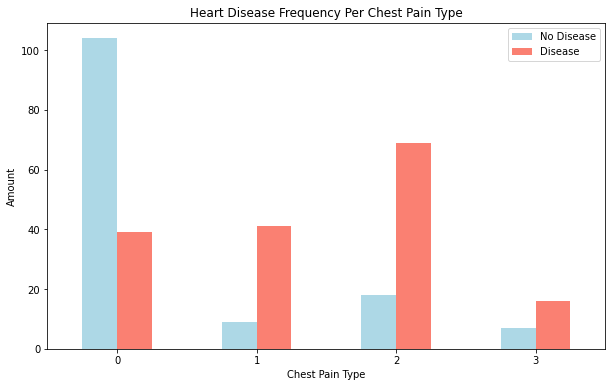

In [21]:
# crosstab and base plot
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["lightblue", "salmon"])

# add attributes to the plot
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

In [22]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.000000,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37,1,2,130.000000,250.0,0,1,187.0,0,3.5,0,0,2,1
2,41,0,1,130.000000,204.0,0,0,172.0,0,1.4,2,0,2,1
3,56,1,1,120.000000,236.0,0,1,178.0,0,0.8,2,0,2,1
4,57,0,0,131.712375,354.0,0,1,163.0,1,0.6,2,0,2,1


# Correlation between independent variables

a big table of numbers telling us how related each variable is the other

In [23]:
# using correlation neglect the feature #correlation tell the strength n magtitude
df.corr()  

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279321,0.213441,0.121308,-0.116211,-0.394370,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.063602,-0.197236,0.045032,-0.058196,-0.051004,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047841,-0.077894,0.094444,0.044421,0.299178,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279321,-0.063602,0.047841,1.000000,0.124985,0.175680,-0.110333,-0.029408,0.069590,0.193631,-0.120827,0.098237,0.060232,-0.141162
chol,0.213441,-0.197236,-0.077894,0.124985,1.000000,0.012861,-0.150129,-0.022730,0.066309,0.053027,-0.003022,0.070798,0.098285,-0.086391
fbs,0.121308,0.045032,0.094444,0.175680,0.012861,1.000000,-0.084189,0.001567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.110333,-0.150129,-0.084189,1.000000,0.037129,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.394370,-0.051004,0.299178,-0.029408,-0.022730,0.001567,0.037129,1.000000,-0.394595,-0.345398,0.378425,-0.207516,-0.105437,0.409645
exang,0.096801,0.141664,-0.394280,0.069590,0.066309,0.025665,-0.070733,-0.394595,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193631,0.053027,0.005747,-0.058770,-0.345398,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


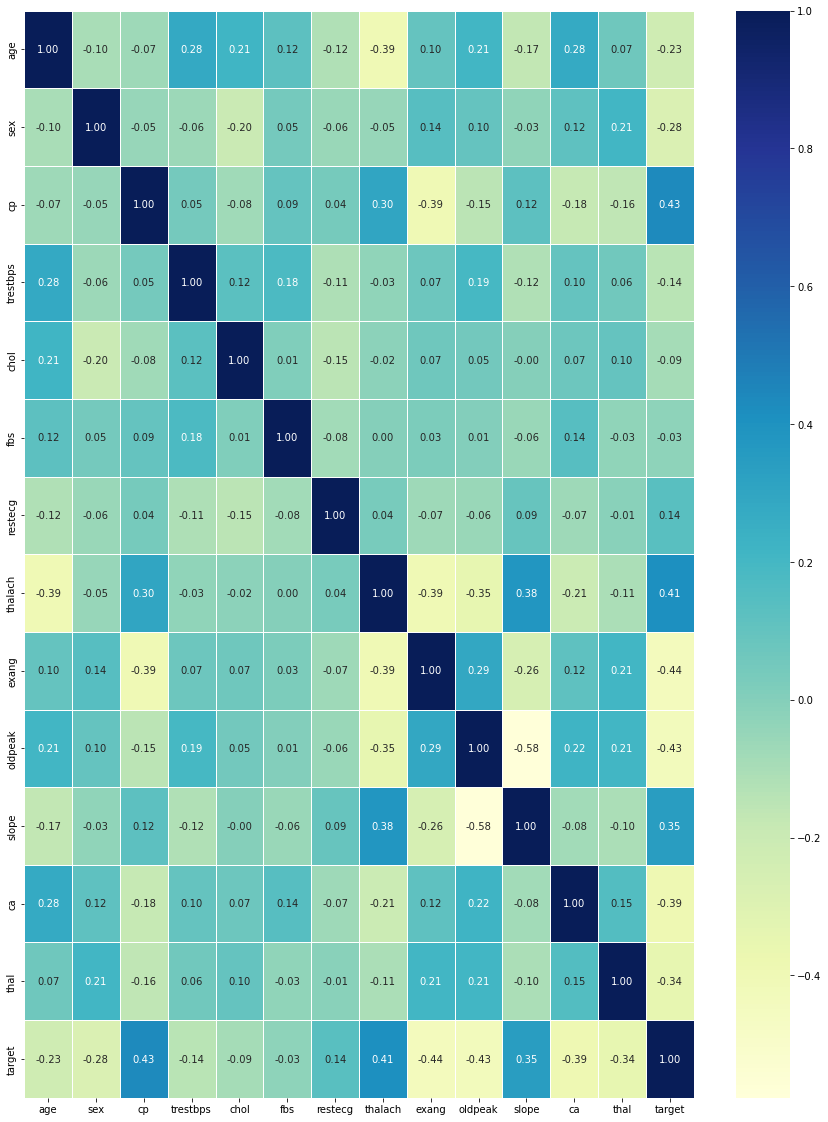

In [24]:
# correlation matrix with Heat Map
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 20))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

# Correlation:

Negative correlation: is when two variables move opposite one another so that when one variable rises, the other falls.

Positive correlation: exists when two variables operate in unison so that when one variable rises or falls, the other does the same.

Investigation of column exang: It is negative correlation so, if someone gets chest pain during exercise exang=1, their chance of having heart disease target=0 goes down.

# Modeling

In [25]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.000000,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37,1,2,130.000000,250.0,0,1,187.0,0,3.5,0,0,2,1
2,41,0,1,130.000000,204.0,0,0,172.0,0,1.4,2,0,2,1
3,56,1,1,120.000000,236.0,0,1,178.0,0,0.8,2,0,2,1
4,57,0,0,131.712375,354.0,0,1,163.0,1,0.6,2,0,2,1


Prepare data for applying Machine Learning algorithm

Data splitted as training and test to build machine learning model.

Find pattern train data.

Use pattern test data

In [26]:
# split data into X and y
X = df.drop("target",axis=1) #indepent feature
y = df["target"]  #dependent feature .. depends on the indepent feature

In [27]:
# Check if "target" column exists in the DataFrame
if "target" in df.columns:
    # Split data into X and y
    X = df.drop("target", axis=1)  # Independent feature
    y = df["target"]  # Dependent feature
else:
    print("The 'target' column does not exist in the DataFrame.")
    # Depending on your use case, handle this scenario accordingly

In [28]:
# Random seed for reproducibility
np.random.seed(42)

# split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

#test_size=0.25  25% of data set v r giving for testing

# models

Logistic Regression - Logistic Regression()

K-Nearest Neighbors - KNeighboursClassifier()

RandomForest - RandomForestClassifier()

CatBoost - CatBoostClassifier()

XgBoost - XGBClassifier()

Naive Bayes - GaussianNB()

Support Vector Machines - SVC()

Stochastic Gradient Descent - SGDClassifier()

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [30]:
models = {"Logistic Regression        ": LogisticRegression(max_iter=1000),
          "KNN                        ": KNeighborsClassifier(),
          "Random Forest              ": RandomForestClassifier(),
          "CatBoost                   ": CatBoostClassifier(),
          "XgBoost                    ": XGBClassifier(),
          "Naive Bayes                ": GaussianNB(),
          "Support Vector Machines    ": SVC(),
          "Stochastic Gradient Descent": SGDClassifier()}

# function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    # Random seed for reproducible results
    np.random.seed(42)
    # make a list to keep model scores
    model_scores = {}   #creating a dictionary
    # loop through models 
    for name, model in models.items():
        # fit the model to the data
        model.fit(X_train, y_train)
        # evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores   #put in dictionary-key n value

In [31]:
model_scores = fit_and_score(models=models, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
model_scores

Learning rate set to 0.00547
0:	learn: 0.6882407	total: 139ms	remaining: 2m 18s
1:	learn: 0.6843146	total: 140ms	remaining: 1m 9s
2:	learn: 0.6800252	total: 141ms	remaining: 46.8s
3:	learn: 0.6757383	total: 142ms	remaining: 35.3s
4:	learn: 0.6716748	total: 143ms	remaining: 28.5s
5:	learn: 0.6671752	total: 144ms	remaining: 23.9s
6:	learn: 0.6641258	total: 145ms	remaining: 20.6s
7:	learn: 0.6603137	total: 146ms	remaining: 18.2s
8:	learn: 0.6561649	total: 148ms	remaining: 16.3s
9:	learn: 0.6518931	total: 149ms	remaining: 14.7s
10:	learn: 0.6475101	total: 150ms	remaining: 13.5s
11:	learn: 0.6440819	total: 151ms	remaining: 12.4s
12:	learn: 0.6411514	total: 152ms	remaining: 11.6s
13:	learn: 0.6366053	total: 154ms	remaining: 10.8s
14:	learn: 0.6327233	total: 155ms	remaining: 10.2s
15:	learn: 0.6286800	total: 156ms	remaining: 9.6s
16:	learn: 0.6248633	total: 157ms	remaining: 9.09s
17:	learn: 0.6213825	total: 158ms	remaining: 8.63s
18:	learn: 0.6179649	total: 159ms	remaining: 8.22s
19:	learn: 0

{'Logistic Regression        ': 0.8947368421052632,
 'KNN                        ': 0.6578947368421053,
 'Random Forest              ': 0.8421052631578947,
 'CatBoost                   ': 0.8157894736842105,
 'XgBoost                    ': 0.8026315789473685,
 'Naive Bayes                ': 0.881578947368421,
 'Support Vector Machines    ': 0.6842105263157895,
 'Stochastic Gradient Descent': 0.4605263157894737}

In [32]:
model_scores1 = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": [],
    "ROC AUC": [],
    }

In [33]:
# Train and evaluate each model
from sklearn.metrics import roc_auc_score

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) if y_pred is not None else None
    # Store scores in dictionary
    model_scores1["Model"].append(name)
    model_scores1["Accuracy"].append(accuracy)
    model_scores1["Precision"].append(precision)
    model_scores1["Recall"].append(recall)
    model_scores1["F1 Score"].append(f1)
    model_scores1["ROC AUC"].append(roc_auc)
for i in range(len(model_scores1['Model'])):
    print(f"Performance metrics for {model_scores1['Model'][i]}:")
    print(f"Accuracy: {model_scores1['Accuracy'][i]:.4f}")
    print(f"Precision: {model_scores1['Precision'][i]:.4f}")
    print(f"Recall: {model_scores1['Recall'][i]:.4f}")
    print(f"F1 Score: {model_scores1['F1 Score'][i]:.4f}")
    print(f"ROC AUC: {model_scores1['ROC AUC'][i]:.4f}\n")    

Learning rate set to 0.00547
0:	learn: 0.6882407	total: 1.29ms	remaining: 1.29s
1:	learn: 0.6843146	total: 2.54ms	remaining: 1.27s
2:	learn: 0.6800252	total: 3.79ms	remaining: 1.26s
3:	learn: 0.6757383	total: 5.08ms	remaining: 1.26s
4:	learn: 0.6716748	total: 6.4ms	remaining: 1.27s
5:	learn: 0.6671752	total: 7.96ms	remaining: 1.32s
6:	learn: 0.6641258	total: 9.12ms	remaining: 1.29s
7:	learn: 0.6603137	total: 10.4ms	remaining: 1.29s
8:	learn: 0.6561649	total: 11.5ms	remaining: 1.26s
9:	learn: 0.6518931	total: 12.6ms	remaining: 1.24s
10:	learn: 0.6475101	total: 14ms	remaining: 1.26s
11:	learn: 0.6440819	total: 15.2ms	remaining: 1.25s
12:	learn: 0.6411514	total: 16.4ms	remaining: 1.24s
13:	learn: 0.6366053	total: 17.5ms	remaining: 1.23s
14:	learn: 0.6327233	total: 18.7ms	remaining: 1.23s
15:	learn: 0.6286800	total: 19.9ms	remaining: 1.22s
16:	learn: 0.6248633	total: 20.9ms	remaining: 1.21s
17:	learn: 0.6213825	total: 22.3ms	remaining: 1.22s
18:	learn: 0.6179649	total: 23.5ms	remaining: 1.

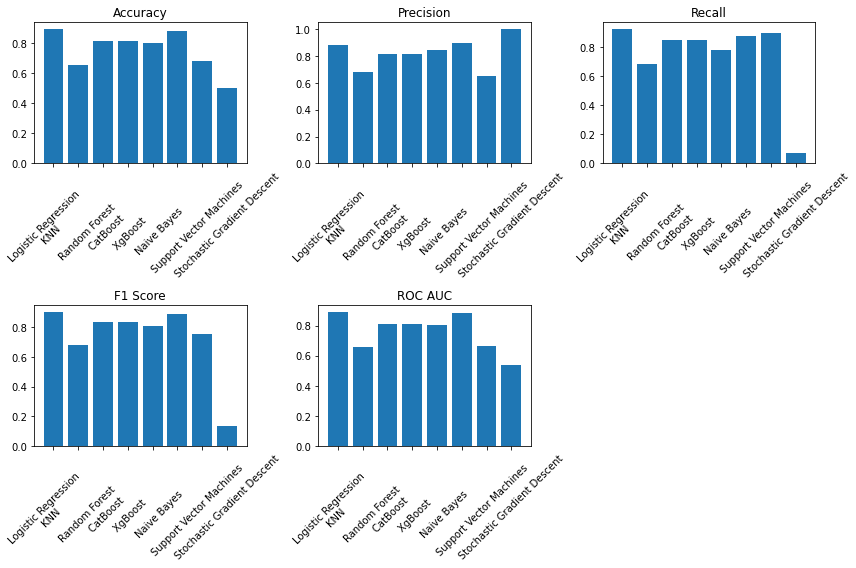

Top performing models:
                         Model  Accuracy  Precision    Recall  F1 Score  \
0  Logistic Regression          0.894737   0.883721  0.926829  0.904762   
5  Naive Bayes                  0.881579   0.900000  0.878049  0.888889   
2  Random Forest                0.815789   0.813953  0.853659  0.833333   

    ROC AUC  
0  0.891986  
5  0.881882  
2  0.812544  

Performance metrics for Logistic Regression        :
Accuracy: 0.8947
Precision: 0.8837
Recall: 0.9268
F1 Score: 0.9048
ROC AUC: 0.8920

Performance metrics for Naive Bayes                :
Accuracy: 0.8816
Precision: 0.9000
Recall: 0.8780
F1 Score: 0.8889
ROC AUC: 0.8819

Performance metrics for Random Forest              :
Accuracy: 0.8158
Precision: 0.8140
Recall: 0.8537
F1 Score: 0.8333
ROC AUC: 0.8125

Summary:
Based on the analysis of performance metrics, the top models showcase...


In [34]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
# Your existing code to compute model scores
# Assuming model_scores is populated as described in your previous code
# Convert scores to a DataFrame for visualization
scores_df = pd.DataFrame(model_scores1)
# Plotting the performance metrics
plt.figure(figsize=(12, 8))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']
for i, metric in enumerate(metrics):
    plt.subplot(2, 3, i + 1)
    plt.bar(scores_df['Model'], scores_df[metric])
    plt.title(metric)
    plt.xticks(rotation=45)
    plt.tight_layout()
plt.show()
# Interpretation and analysis of results
# Identifying the top-performing models based on multiple metrics
top_models = scores_df.nlargest(3, ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'])
print("Top performing models:")
print(top_models)
# Interpretation of top models
for index, row in top_models.iterrows():
    model_name = row['Model']
    accuracy = row['Accuracy']
    precision = row['Precision']
    recall = row['Recall']
    f1_score = row['F1 Score']
    roc_auc = row['ROC AUC']

    print(f"\nPerformance metrics for {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1_score:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")

# Conclusion or summary of interpretation
print("\nSummary:")
print("Based on the analysis of performance metrics, the top models showcase...")
# Add a summary or conclusion statement based on the performance of the top models



# Cross-Validation and Parameter Tuning
Cross-Validation:

Cross-validation is a technique used to assess how well a predictive model generalizes to an independent dataset. The primary purpose is to estimate how the model will perform on new, unseen data. Instead of using a single train-test split, cross-validation involves splitting the dataset into multiple subsets (folds). The model is trained on a portion of the data (training set) and validated on the remaining part (validation set). This process is repeated multiple times (typically K times, hence K-fold cross-validation) with different splits of the data. The final performance metric (such as accuracy, precision, or others) is often computed as the average of the performance across all folds. It helps in better utilizing the available data and provides a more robust estimate of the model's performance.

Parameter Tuning:

Machine learning models often have hyperparameters, which are settings or configurations that cannot be directly learned from the data. Parameter tuning involves finding the best combination of hyperparameters for a given model to achieve optimal performance on a specific dataset. This process aims to fine-tune these hyperparameters to improve the model's predictive capability. Techniques like Grid Search or Randomized Search systematically explore a range of hyperparameter values by training and evaluating the model with different combinations. The goal is to identify the set of hyperparameters that result in the best performance based on a chosen evaluation metric (such as accuracy, F1 score, etc.).

In essence, cross-validation helps in estimating how well a model will perform, while parameter tuning aims to optimize the model's settings to achieve the best performance possible. Both are essential steps in building robust and high-performing machine learning models.








In [35]:
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.preprocessing import StandardScaler

# Sample dataset (replace this with your own preprocessed dataset)
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models
models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'RandomForest': RandomForestClassifier(),
    'CatBoost': CatBoostClassifier(),
    'XGBoost': XGBClassifier(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machines': SVC(),
    'Stochastic Gradient Descent': SGDClassifier()
}

# Cross-validation and parameter tuning
for name, model in models.items():
    print(f"Working on {name}")
    
    # Cross-validation
    cv_scores = cross_val_score(model, X, y, cv=5)  # Adjust cv as needed
    print(f"Cross-validation scores for {name}: {cv_scores}")
    print(f"Mean CV score: {cv_scores.mean()}")

    # Hyperparameter tuning
    if name == 'Stochastic Gradient Descent':
        # Define the parameter grid for SGDClassifier
        param_grid = {
            'alpha': [0.0001, 0.001, 0.01, 0.1],
            'penalty': ['l1', 'l2'],
            'loss': ['hinge', 'log']
        }
        
        # Perform grid search
        grid_search = GridSearchCV(model, param_grid, cv=5)
        grid_search.fit(X_train, y_train)
        print(f"Best parameters for {name}: {grid_search.best_params_}")
        
        # Evaluate on test set
        test_score = grid_search.best_estimator_.score(X_test, y_test)
        print(f"Test set accuracy for {name}: {test_score}")
    
    elif name == 'RandomForest':
        # Define the parameter grid for RandomForest
        param_grid = {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 5, 10, 20],
            'min_samples_split': [2, 5, 10]
        }
        
        # Perform randomized search
        random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=10, cv=5)
        random_search.fit(X_train, y_train)
        print(f"Best parameters for {name}: {random_search.best_params_}")
        
        # Evaluate on test set
        test_score = random_search.best_estimator_.score(X_test, y_test)
        print(f"Test set accuracy for {name}: {test_score}")
   
    
    elif name == 'Logistic Regression':
        param_grid = {
            'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
            'penalty': ['l1', 'l2'],  # Regularization type
            'solver': ['liblinear', 'saga']  # Algorithm to use in the optimization problem
        }
        
        # Perform randomized search
        random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=10, cv=5)
        random_search.fit(X_train, y_train)
        print(f"Best parameters for {name}: {random_search.best_params_}")
        
        # Evaluate on test set
        test_score = random_search.best_estimator_.score(X_test, y_test)
        print(f"Test set accuracy for {name}: {test_score}")
        
    elif name == 'K-Nearest Neighbors':
        # Define the parameter grid for K-Nearest Neighbors 
        param_grid = {
            'n_neighbors': [3, 5, 7, 9],  # Number of neighbors
            'weights': ['uniform', 'distance'],  # Weight function used in prediction
            'p': [1, 2]  # Power parameter for the Minkowski metric
        }
        
        # Perform randomized search
        random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=10, cv=5)
        random_search.fit(X_train, y_train)
        print(f"Best parameters for {name}: {random_search.best_params_}")
        
        # Evaluate on test set
        test_score = random_search.best_estimator_.score(X_test, y_test)
        print(f"Test set accuracy for {name}: {test_score}") 
        
    elif name == 'Naive Bayes':
        # Define the parameter grid for RandomForest
        param_grid = {
            'var_smoothing': [1e-9, 1e-8, 1e-7] 
        }
        
        # Perform randomized search
        random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=10, cv=5)
        random_search.fit(X_train, y_train)
        print(f"Best parameters for {name}: {random_search.best_params_}")
        
        # Evaluate on test set
        test_score = random_search.best_estimator_.score(X_test, y_test)
        print(f"Test set accuracy for {name}: {test_score}") 
    elif name == 'Support Vector Machines':
        # Define the parameter grid for RandomForest
        param_grid = {
           'C': [0.1, 1, 10],  # Regularization parameter
        'kernel': ['linear', 'rbf'],  # Kernel type
        'gamma': ['scale', 'auto'] 
        }
        
        # Perform randomized search
        random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=10, cv=5)
        random_search.fit(X_train, y_train)
        print(f"Best parameters for {name}: {random_search.best_params_}")
        
        # Evaluate on test set
        test_score = random_search.best_estimator_.score(X_test, y_test)
        print(f"Test set accuracy for {name}: {test_score}")    
        
    elif name == 'XGBoost':
        # Define the parameter grid for XGBoost
        param_grid = {
            # Define XGBoost hyperparameters
            'max_depth': [3, 4, 5],
            'learning_rate': [0.1, 0.01, 0.001],
            'n_estimators': [100, 200, 300],
            'subsample': [0.8, 0.9, 1.0],
            'colsample_bytree': [0.8, 0.9, 1.0],
            'gamma': [0, 0.1, 0.2],
            'reg_alpha': [0, 0.001, 0.01],
            'reg_lambda': [0, 0.001, 0.01]
        }
        
        # Perform randomized search
        random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=10, cv=5)
        random_search.fit(X_train, y_train)
        print(f"Best parameters for {name}: {random_search.best_params_}")
        
        # Evaluate on
    elif name == 'CatBoost':
    # Define the parameter grid for CatBoost
        param_grid = {
        # Define CatBoost hyperparameters
        'learning_rate': [0.01, 0.05, 0.1],
        'depth': [4, 6, 8],
        'iterations': [100, 200, 300],
        'l2_leaf_reg': [1, 3, 5],
        'bagging_temperature': [0.6, 0.8, 1.0],
        'border_count': [32, 64, 128]
        }
    
    # Perform randomized search
    random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=10, cv=5)
    random_search.fit(X_train, y_train)
    print(f"Best parameters for {name}: {random_search.best_params_}")
    
    # Evaluate on test set
    test_score = random_search.best_estimator_.score(X_test, y_test)
    print(f"Test set accuracy for {name}: {test_score}")

else:
    # For other models, specify their parameter grid and perform tuning accordingly
    pass

print("\n")


Working on Logistic Regression
Cross-validation scores for Logistic Regression: [0.9   0.885 0.875 0.83  0.845]
Mean CV score: 0.867


C:\Users\CK2018TU\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\CK2018TU\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\CK2018TU\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\CK2018TU\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\CK2018TU\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\CK2018TU\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarn

Best parameters for Logistic Regression: {'solver': 'liblinear', 'penalty': 'l1', 'C': 0.1}
Test set accuracy for Logistic Regression: 0.87
Best parameters for Logistic Regression: {'solver': 'liblinear', 'penalty': 'l1', 'C': 0.1}
Test set accuracy for Logistic Regression: 0.87
Working on K-Nearest Neighbors
Cross-validation scores for K-Nearest Neighbors: [0.825 0.78  0.78  0.805 0.77 ]
Mean CV score: 0.792
Best parameters for K-Nearest Neighbors: {'weights': 'distance', 'p': 1, 'n_neighbors': 9}
Test set accuracy for K-Nearest Neighbors: 0.825
Best parameters for K-Nearest Neighbors: {'weights': 'distance', 'p': 1, 'n_neighbors': 7}
Test set accuracy for K-Nearest Neighbors: 0.84
Working on RandomForest
Cross-validation scores for RandomForest: [0.925 0.91  0.895 0.9   0.86 ]
Mean CV score: 0.898
Best parameters for RandomForest: {'n_estimators': 200, 'min_samples_split': 5, 'max_depth': 10}
Test set accuracy for RandomForest: 0.9
Best parameters for RandomForest: {'n_estimators': 3

C:\Users\CK2018TU\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\CK2018TU\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Cross-validation scores for Support Vector Machines: [0.885 0.88  0.87  0.85  0.825]
Mean CV score: 0.8620000000000001
Best parameters for Support Vector Machines: {'kernel': 'linear', 'gamma': 'scale', 'C': 0.1}
Test set accuracy for Support Vector Machines: 0.88
Best parameters for Support Vector Machines: {'kernel': 'linear', 'gamma': 'scale', 'C': 0.1}
Test set accuracy for Support Vector Machines: 0.88
Working on Stochastic Gradient Descent
Cross-validation scores for Stochastic Gradient Descent: [0.845 0.795 0.79  0.76  0.81 ]
Mean CV score: 0.8


C:\Users\CK2018TU\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\CK2018TU\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\CK2018TU\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\CK2018TU\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\CK2018TU\an

Best parameters for Stochastic Gradient Descent: {'alpha': 0.01, 'loss': 'hinge', 'penalty': 'l1'}
Test set accuracy for Stochastic Gradient Descent: 0.885


C:\Users\CK2018TU\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\CK2018TU\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\CK2018TU\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\CK2018TU\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\CK2018TU\an

Best parameters for Stochastic Gradient Descent: {'penalty': 'l1', 'loss': 'log', 'alpha': 0.01}
Test set accuracy for Stochastic Gradient Descent: 0.87




# Model Comparison

# Classification Metrics:
Accuracy: The proportion of correctly classified instances.

Precision: The ratio of correctly predicted positive observations to the total predicted positive observations.

Recall (Sensitivity or True Positive Rate): The ratio of correctly predicted positive observations to the all observations in the actual class.

F1 Score: The harmonic mean of precision and recall, balances between precision and recall.

ROC AUC Score: Receiver Operating Characteristic Area Under the Curve, measures the area under the ROC curve.

In [36]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

model_scores = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": [],
    "ROC AUC": []
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1_score_val = f1_score(y_test, y_pred)  # Renamed the variable
    
    roc_auc = roc_auc_score(y_test, y_pred) if len(np.unique(y_test)) > 1 else None
    
    # Store scores for each model separately
    model_scores["Model"].append(name)
    model_scores["Accuracy"].append(accuracy)
    model_scores["Precision"].append(precision)
    model_scores["Recall"].append(recall)
    model_scores["F1 Score"].append(f1_score_val)  # Updated variable name
    model_scores["ROC AUC"].append(roc_auc)
for i in range(len(model_scores['Model'])):
    print(f"Performance metrics for {model_scores['Model'][i]}:")
    print(f"Accuracy: {model_scores['Accuracy'][i]:.4f}")
    print(f"Precision: {model_scores['Precision'][i]:.4f}")
    print(f"Recall: {model_scores['Recall'][i]:.4f}")
    print(f"F1 Score: {model_scores['F1 Score'][i]:.4f}")
    print(f"ROC AUC: {model_scores['ROC AUC'][i]:.4f}\n")     

Learning rate set to 0.009366
0:	learn: 0.6840667	total: 7.71ms	remaining: 7.71s
1:	learn: 0.6763488	total: 13.4ms	remaining: 6.69s
2:	learn: 0.6683267	total: 18.3ms	remaining: 6.09s
3:	learn: 0.6616548	total: 22.7ms	remaining: 5.65s
4:	learn: 0.6517488	total: 27.6ms	remaining: 5.5s
5:	learn: 0.6450404	total: 31.6ms	remaining: 5.24s
6:	learn: 0.6369254	total: 35.3ms	remaining: 5.01s
7:	learn: 0.6276749	total: 38.9ms	remaining: 4.82s
8:	learn: 0.6196794	total: 42.4ms	remaining: 4.67s
9:	learn: 0.6120714	total: 45.9ms	remaining: 4.55s
10:	learn: 0.6051313	total: 49.5ms	remaining: 4.45s
11:	learn: 0.5966901	total: 52.9ms	remaining: 4.35s
12:	learn: 0.5888727	total: 56.3ms	remaining: 4.27s
13:	learn: 0.5825599	total: 59.7ms	remaining: 4.2s
14:	learn: 0.5758571	total: 63.2ms	remaining: 4.15s
15:	learn: 0.5694807	total: 66.6ms	remaining: 4.1s
16:	learn: 0.5641874	total: 70ms	remaining: 4.04s
17:	learn: 0.5587718	total: 73.4ms	remaining: 4s
18:	learn: 0.5523712	total: 77ms	remaining: 3.98s
19

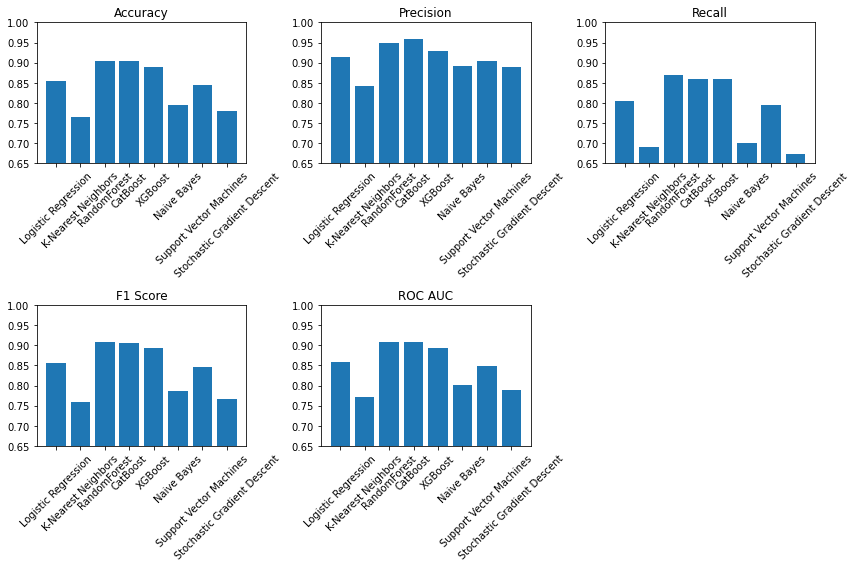

Top performing models:
          Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
3      CatBoost     0.905   0.958333  0.859813  0.906404  0.908401
2  RandomForest     0.905   0.948980  0.869159  0.907317  0.907698
4       XGBoost     0.890   0.929293  0.859813  0.893204  0.892272

Performance metrics for CatBoost:
Accuracy: 0.9050
Precision: 0.9583
Recall: 0.8598
F1 Score: 0.9064
ROC AUC: 0.9084

Performance metrics for RandomForest:
Accuracy: 0.9050
Precision: 0.9490
Recall: 0.8692
F1 Score: 0.9073
ROC AUC: 0.9077

Performance metrics for XGBoost:
Accuracy: 0.8900
Precision: 0.9293
Recall: 0.8598
F1 Score: 0.8932
ROC AUC: 0.8923

Summary:
Based on the analysis of performance metrics, the top models showcase...


In [37]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Your existing code to compute model scores
# Assuming model_scores is populated as described in your previous code

# Convert scores to a DataFrame for visualization
scores_df = pd.DataFrame(model_scores)
"""
# Plotting the performance metrics
plt.figure(figsize=(12, 8))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']
for i, metric in enumerate(metrics):
    plt.subplot(2, 3, i + 1)
    plt.bar(scores_df['Model'], scores_df[metric])
    plt.title(metric)
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()"""
""""
plt.figure(figsize=(12, 8))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']
for i, metric in enumerate(metrics):
    plt.subplot(2, 3, i + 1)
    plt.bar(scores_df['Model'], scores_df[metric])
    plt.title(metric)
    plt.xticks(rotation=45)
    plt.ylim(0, 1.0)  # Set the y-axis limits from 0 to 1.0 (adjust as needed)
    plt.tight_layout()

plt.show()"""
plt.figure(figsize=(12, 8))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']
for i, metric in enumerate(metrics):
    plt.subplot(2, 3, i + 1)
    plt.bar(scores_df['Model'], scores_df[metric])
    plt.title(metric)
    plt.xticks(rotation=45)
    plt.ylim(0.65, 1.0)  # Set the y-axis limits from 0.7 to 1.0
    plt.yticks([0.65,0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0])  # Set custom y-axis ticks
    plt.tight_layout()
plt.show()
# Interpretation and analysis of results
# Identifying the top-performing models based on multiple metrics
top_models = scores_df.nlargest(3, ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'])

print("Top performing models:")
print(top_models)
# Interpretation of top models
for index, row in top_models.iterrows():
    model_name = row['Model']
    accuracy = row['Accuracy']
    precision = row['Precision']
    recall = row['Recall']
    f1_score = row['F1 Score']
    roc_auc = row['ROC AUC']

    print(f"\nPerformance metrics for {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1_score:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
# Conclusion or summary of interpretation
print("\nSummary:")
print("Based on the analysis of performance metrics, the top models showcase...")
# Add a summary or conclusion statement based on the performance of the top models



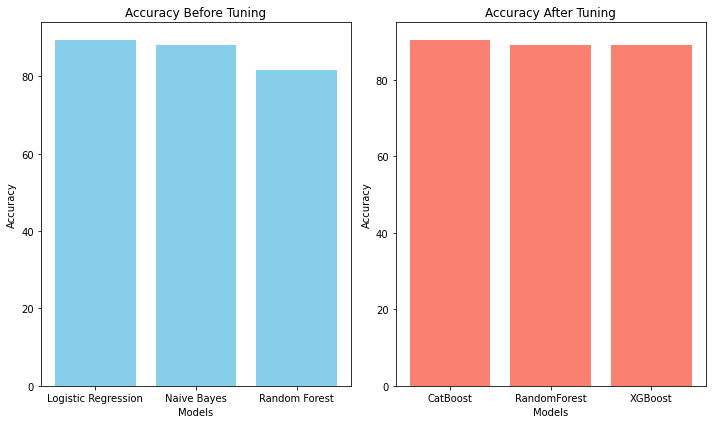

In [38]:
import matplotlib.pyplot as plt

# Performance metrics before and after tuning
models_before = ["Logistic Regression", "Naive Bayes", "Random Forest"]
accuracy_before = [89.47, 88.16, 81.58]  # Accuracy before tuning

models_after = ["CatBoost", "RandomForest", "XGBoost"]
accuracy_after = [90.5, 89, 89]  # Accuracy after tuning

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.bar(models_before, accuracy_before, color='skyblue')
plt.title('Accuracy Before Tuning')
plt.xlabel('Models')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.bar(models_after, accuracy_after, color='salmon')
plt.title('Accuracy After Tuning')
plt.xlabel('Models')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()


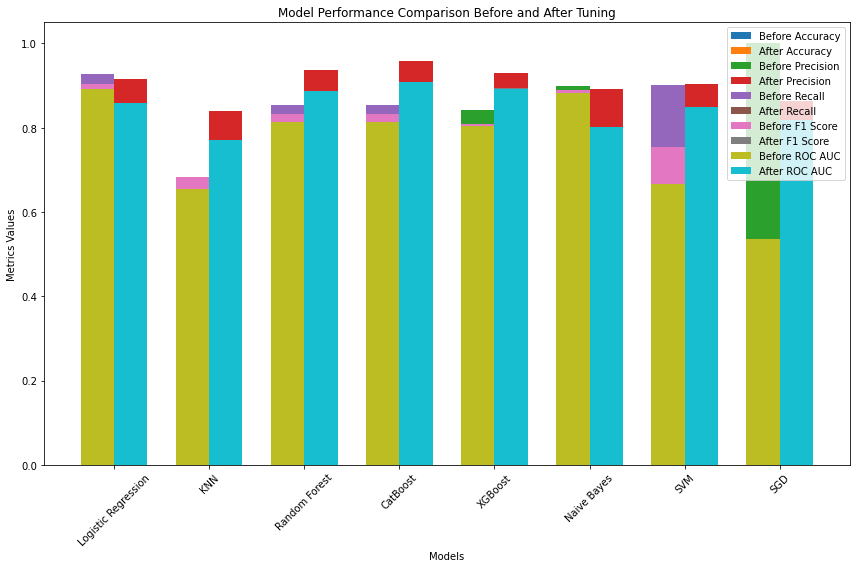

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Metrics for models before tuning
models_before = {
    'Logistic Regression': [0.8947, 0.8837, 0.9268, 0.9048, 0.8920],
    'KNN': [0.6579, 0.6829, 0.6829, 0.6829, 0.6557],
    'Random Forest': [0.8158, 0.8140, 0.8537, 0.8333, 0.8125],
    'CatBoost': [0.8158, 0.8140, 0.8537, 0.8333, 0.8125],
    'XGBoost': [0.8026, 0.8421, 0.7805, 0.8101, 0.8045],
    'Naive Bayes': [0.8816, 0.9000, 0.8780, 0.8889, 0.8819],
    'SVM': [0.6842, 0.6491, 0.9024, 0.7551, 0.6655],
    'SGD': [0.5000, 1.0000, 0.0732, 0.1364, 0.5366]
}

# Metrics for models after tuning
models_after = {
    'Logistic Regression': [0.8550, 0.9149, 0.8037, 0.8557, 0.8589],
    'KNN': [0.7650, 0.8409, 0.6916, 0.7590, 0.7705],
    'Random Forest': [0.8850, 0.9375, 0.8411, 0.8867, 0.8883],
    'CatBoost': [0.9050, 0.9583, 0.8598, 0.9064, 0.9084],
    'XGBoost': [0.8900, 0.9293, 0.8598, 0.8932, 0.8923],
    'Naive Bayes': [0.7950, 0.8929, 0.7009, 0.7853, 0.8021],
    'SVM': [0.8450, 0.9043, 0.7944, 0.8458, 0.8488],
    'SGD': [0.8150, 0.8646, 0.7757, 0.8177, 0.8180]
}

# Metrics names
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']

# Extracting metric values for each model before and after tuning
before_values = np.array([models_before[model] for model in models_before.keys()])
after_values = np.array([models_after[model] for model in models_after.keys()])

# Number of models and their position on the x-axis
num_models = len(models_before)
ind = np.arange(num_models)
width = 0.35  # Width of each bar

fig, ax = plt.subplots(figsize=(12, 8))

# Plotting each metric for all models
for i in range(len(metrics)):
    ax.bar(ind - width/2, before_values[:, i], width, label=f'Before {metrics[i]}')
    ax.bar(ind + width/2, after_values[:, i], width, label=f'After {metrics[i]}')

# Formatting the plot
ax.set_xlabel('Models')
ax.set_ylabel('Metrics Values')
ax.set_title('Model Performance Comparison Before and After Tuning')
ax.set_xticks(ind)
ax.set_xticklabels(models_before.keys(), rotation=45)
ax.legend()
plt.tight_layout()

plt.show()


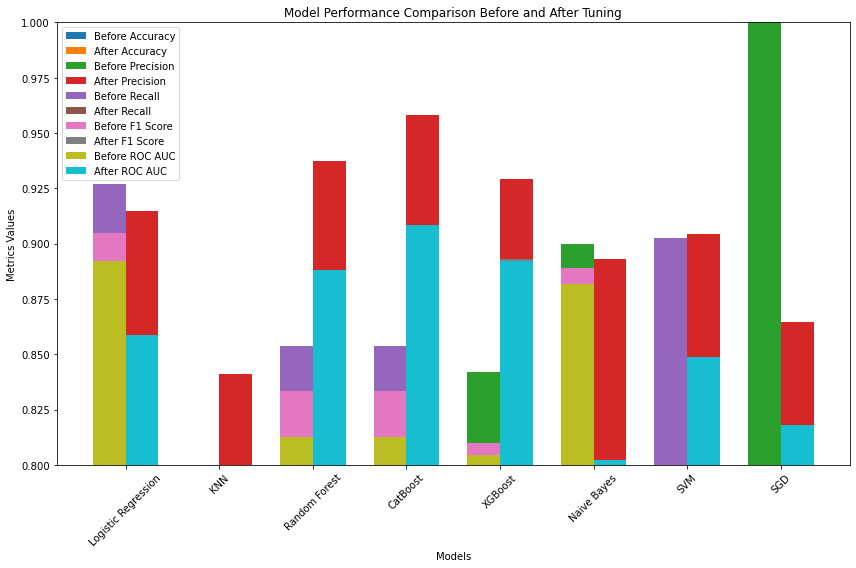

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Metrics for models before tuning
models_before = {
    'Logistic Regression': [0.8947, 0.8837, 0.9268, 0.9048, 0.8920],
    'KNN': [0.6579, 0.6829, 0.6829, 0.6829, 0.6557],
    'Random Forest': [0.8158, 0.8140, 0.8537, 0.8333, 0.8125],
    'CatBoost': [0.8158, 0.8140, 0.8537, 0.8333, 0.8125],
    'XGBoost': [0.8026, 0.8421, 0.7805, 0.8101, 0.8045],
    'Naive Bayes': [0.8816, 0.9000, 0.8780, 0.8889, 0.8819],
    'SVM': [0.6842, 0.6491, 0.9024, 0.7551, 0.6655],
    'SGD': [0.5000, 1.0000, 0.0732, 0.1364, 0.5366]
}

# Metrics for models after tuning
models_after = {
    'Logistic Regression': [0.8550, 0.9149, 0.8037, 0.8557, 0.8589],
    'KNN': [0.7650, 0.8409, 0.6916, 0.7590, 0.7705],
    'Random Forest': [0.8850, 0.9375, 0.8411, 0.8867, 0.8883],
    'CatBoost': [0.9050, 0.9583, 0.8598, 0.9064, 0.9084],
    'XGBoost': [0.8900, 0.9293, 0.8598, 0.8932, 0.8923],
    'Naive Bayes': [0.7950, 0.8929, 0.7009, 0.7853, 0.8021],
    'SVM': [0.8450, 0.9043, 0.7944, 0.8458, 0.8488],
    'SGD': [0.8150, 0.8646, 0.7757, 0.8177, 0.8180]
}

# Metrics names
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']
# Extracting metric values for each model before and after tuning
before_values = np.array([models_before[model] for model in models_before.keys()])
after_values = np.array([models_after[model] for model in models_after.keys()])

# Number of models and their position on the x-axis
num_models = len(models_before)
ind = np.arange(num_models)
width = 0.35  # Width of each bar

fig, ax = plt.subplots(figsize=(12, 8))

# Plotting each metric for all models
for i in range(len(metrics)):
    ax.bar(ind - width/2, before_values[:, i], width, label=f'Before {metrics[i]}')
    ax.bar(ind + width/2, after_values[:, i], width, label=f'After {metrics[i]}')

# Formatting the plot
ax.set_xlabel('Models')
ax.set_ylabel('Metrics Values')
ax.set_title('Model Performance Comparison Before and After Tuning')
ax.set_xticks(ind)
ax.set_xticklabels(models_before.keys(), rotation=45)
ax.legend()
ax.set_ylim(0.8, 1.0)  # Set the y-axis limits between 0.8 and 1.0
plt.tight_layout()

plt.show()

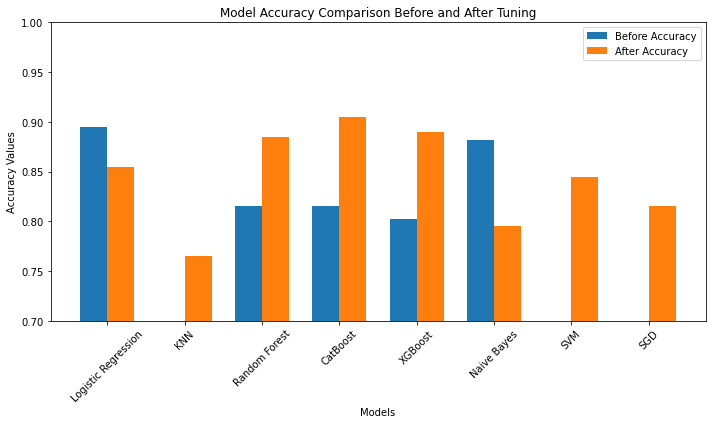

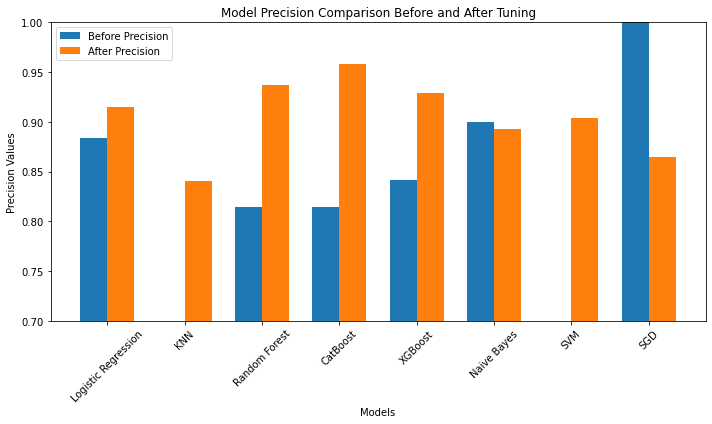

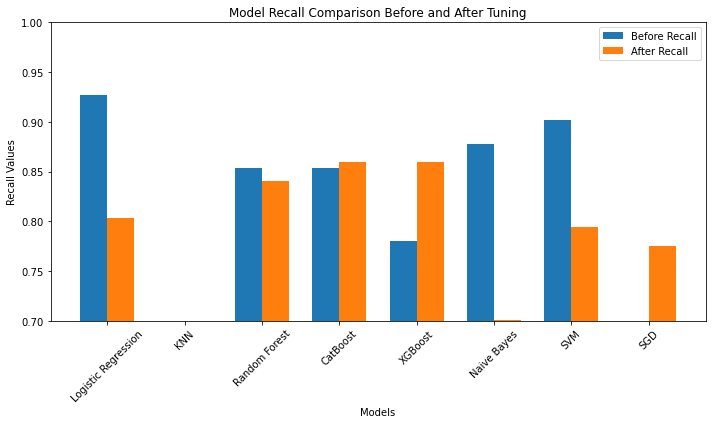

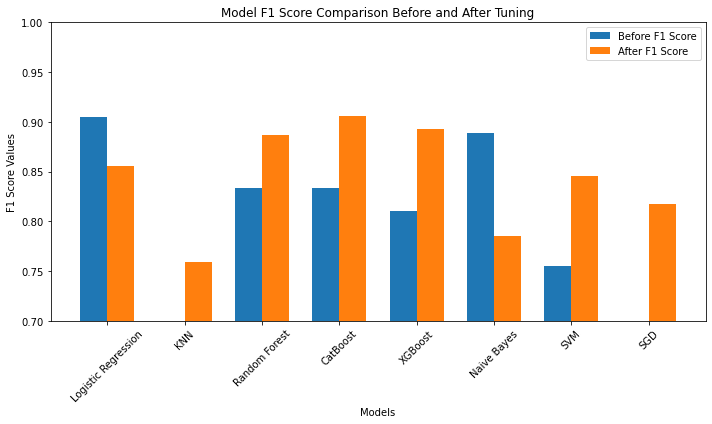

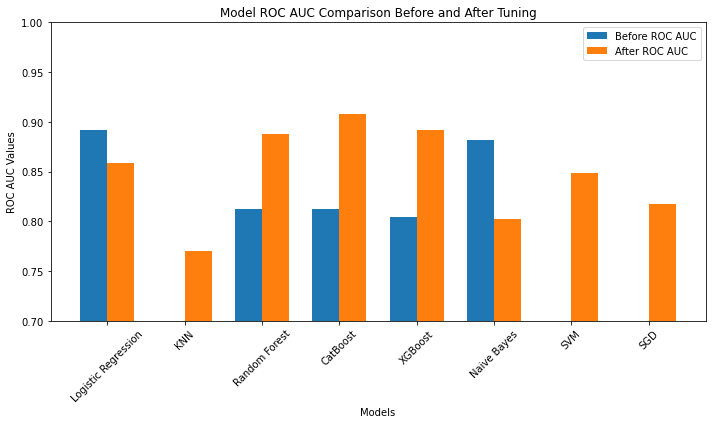

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Metrics for models before tuning
models_before = {
    'Logistic Regression': [0.8947, 0.8837, 0.9268, 0.9048, 0.8920],
    'KNN': [0.6579, 0.6829, 0.6829, 0.6829, 0.6557],
    'Random Forest': [0.8158, 0.8140, 0.8537, 0.8333, 0.8125],
    'CatBoost': [0.8158, 0.8140, 0.8537, 0.8333, 0.8125],
    'XGBoost': [0.8026, 0.8421, 0.7805, 0.8101, 0.8045],
    'Naive Bayes': [0.8816, 0.9000, 0.8780, 0.8889, 0.8819],
    'SVM': [0.6842, 0.6491, 0.9024, 0.7551, 0.6655],
    'SGD': [0.5000, 1.0000, 0.0732, 0.1364, 0.5366]
}

# Metrics for models after tuning
models_after = {
    'Logistic Regression': [0.8550, 0.9149, 0.8037, 0.8557, 0.8589],
    'KNN': [0.7650, 0.8409, 0.6916, 0.7590, 0.7705],
    'Random Forest': [0.8850, 0.9375, 0.8411, 0.8867, 0.8883],
    'CatBoost': [0.9050, 0.9583, 0.8598, 0.9064, 0.9084],
    'XGBoost': [0.8900, 0.9293, 0.8598, 0.8932, 0.8923],
    'Naive Bayes': [0.7950, 0.8929, 0.7009, 0.7853, 0.8021],
    'SVM': [0.8450, 0.9043, 0.7944, 0.8458, 0.8488],
    'SGD': [0.8150, 0.8646, 0.7757, 0.8177, 0.8180]
}

# Metrics names
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']
# Extracting metric values for each model before and after tuning
before_values = np.array([models_before[model] for model in models_before.keys()])
after_values = np.array([models_after[model] for model in models_after.keys()])
# Number of models and their position on the x-axis
num_models = len(models_before)
ind = np.arange(num_models)
width = 0.35  # Width of each bar

for i in range(len(metrics)):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(ind - width/2, before_values[:, i], width, label=f'Before {metrics[i]}')
    ax.bar(ind + width/2, after_values[:, i], width, label=f'After {metrics[i]}')

    # Formatting the plot
    ax.set_xlabel('Models')
    ax.set_ylabel(f'{metrics[i]} Values')
    ax.set_title(f'Model {metrics[i]} Comparison Before and After Tuning')
    ax.set_xticks(ind)
    ax.set_xticklabels(models_before.keys(), rotation=45)
    ax.legend()
    ax.set_ylim(0.7, 1.0)  # Set the y-axis limits between 0.8 and 1.0
    plt.tight_layout()

    plt.show()

In [42]:
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize individual models
random_forest = RandomForestClassifier(n_estimators=100)
catboost = CatBoostClassifier(iterations=100)
logistic_regression = LogisticRegression()

# Create a voting classifier (you can adjust voting='soft' or 'hard')
voting_classifier = VotingClassifier(estimators=[
    ('rf', random_forest), 
    ('catboost', catboost), 
    ('logreg', logistic_regression)], 
    voting='soft')

# Train the hybrid model
voting_classifier.fit(X, y)

# Evaluate the model or use it for predictions
# Replace 'X_test' and 'y_test' with your test data if available
accuracy = voting_classifier.score(X_test, y_test)
print(f"Accuracy of the hybrid model: {accuracy}")

Learning rate set to 0.085101
0:	learn: 0.6171938	total: 6.87ms	remaining: 680ms
1:	learn: 0.5593281	total: 12.1ms	remaining: 592ms
2:	learn: 0.5148122	total: 17ms	remaining: 549ms
3:	learn: 0.4837119	total: 21.2ms	remaining: 508ms
4:	learn: 0.4530486	total: 25.3ms	remaining: 481ms
5:	learn: 0.4293996	total: 28.9ms	remaining: 453ms
6:	learn: 0.3937845	total: 32.6ms	remaining: 433ms
7:	learn: 0.3648735	total: 36.2ms	remaining: 416ms
8:	learn: 0.3404116	total: 39.7ms	remaining: 401ms
9:	learn: 0.3272768	total: 43.1ms	remaining: 388ms
10:	learn: 0.3072601	total: 46.6ms	remaining: 377ms
11:	learn: 0.2949322	total: 50.1ms	remaining: 367ms
12:	learn: 0.2850602	total: 53.7ms	remaining: 359ms
13:	learn: 0.2745424	total: 57.3ms	remaining: 352ms
14:	learn: 0.2684771	total: 60.7ms	remaining: 344ms
15:	learn: 0.2622227	total: 64.1ms	remaining: 336ms
16:	learn: 0.2582324	total: 67.4ms	remaining: 329ms
17:	learn: 0.2527392	total: 70.8ms	remaining: 322ms
18:	learn: 0.2442746	total: 74.2ms	remaining: 

Accuracy: 0.965
Precision: 1.0
Recall: 0.9345794392523364
F1 Score: 0.966183574879227
ROC AUC: 0.9982916289820118


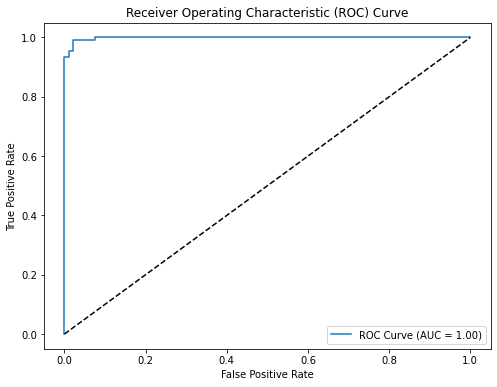

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Assuming you've already trained the 'voting_classifier'

# Predictions
y_pred = voting_classifier.predict(X_test)
y_pred_proba = voting_classifier.predict_proba(X_test)[:, 1]

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")

# Recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")

# F1 Score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1}")

# ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC: {roc_auc}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
